In [1]:
import jitr

import rxmc

Using database version X4-2024-12-31 located in: /home/beyerk/db/exfor/unpack_exfor-2024/X4-2024-12-31


In [2]:
jitr.__version__

'2.6.dev2+gd174fec'

In [3]:
import lzma

import corner
import dill as pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from tqdm import tqdm

## Define reaction participants

In [4]:
from exfor_tools import curate

In [5]:
Ca40 = (40, 20)
Ca48 = (48, 20)
targets = [Ca40, Ca48]
p = (1, 1)
n = (1, 0)
projectiles = [n, p]
reactions = [
    jitr.reactions.ElasticReaction(projectile=proj, target=targ)
    for proj in projectiles
    for targ in targets
]
reactions

[40-Ca(n,el), 48-Ca(n,el), 40-Ca(p,el), 48-Ca(p,el)]

In [6]:
quantities = {n: ["dXS/dA", "Ay"], p: ["dXS/dA", "dXS/dRuth", "Ay"]}

In [7]:
data = []
for reaction in reactions:
    data.append(
        curate.MultiQuantityReactionData(
            reaction=reaction,
            quantities=quantities[tuple(reaction.projectile)],
            settings={
                "Einc_range": [8, 100],
                "filter_kwargs": {"min_num_pts": 5, "allow_cos": True},
            },
            vocal=True,
        )
    )


Now parsing dXS/dA for 40-Ca(n,el)

Found subentry 11611003 with the following columns:
['EN', 'ANG-RSL', 'COS-CM', 'DATA-CM', 'DATA-ERR']
Failed to parse subentry 11611003:
	Error while parsing 11611003: Cannot parse angle frame from COS-CM, expected -CM or -LAB suffix
Found subentry 12785002 with the following columns:
['EN', 'EN-RSL', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry 12996002 with the following columns:
['EN', 'EN-RSL', 'ANG-CM', 'DATA', 'DATA-ERR']
Found subentry 13946003 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'ERR-S', 'ERR-SYS']
Found subentry 14303002 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry 14303003 with the following columns:
['EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']

Succesfully parsed 4 entries
Failed to parse 1 entries:


Now parsing Ay for 40-Ca(n,el)

Found subentry 12785003 with the following columns:
['POL-BM', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found sube

In [8]:
print(reactions[0])
data[0].num_measurements

40-Ca(n,el)


{'dXS/dA': 11, 'Ay': 6}

In [9]:
data[0].data["dXS/dA"].print_failed_parses()

Entry: 11611
11611003  :  Error while parsing 11611003: Cannot parse angle frame from COS-CM, expected -CM or -LAB suffix
ERR-ANALYS (DATA-ERR) Total relative uncertainty, excluding
            possible normalization error of 10%



In [10]:
data[0].data["Ay"].print_failed_parses()

(-20.0, 180.0)

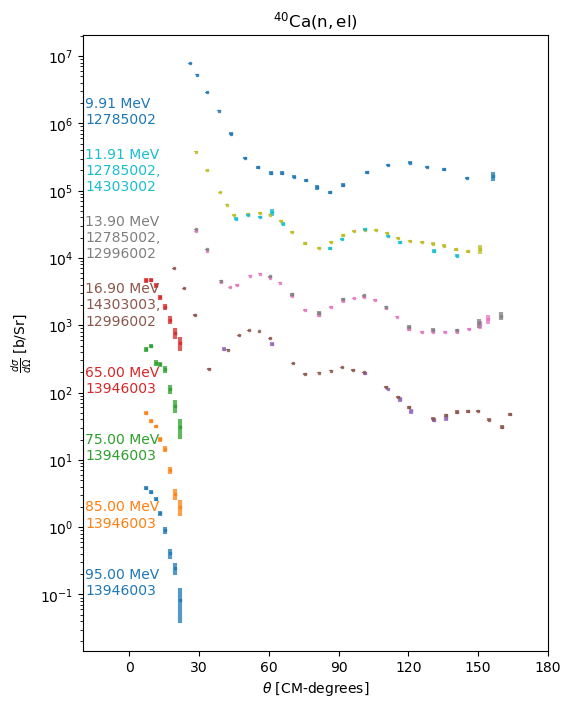

In [34]:
axes = (
    data[0]
    .data["dXS/dA"]
    .plot(
        n_per_plot=10,
        label_kwargs={
            "label_xloc_deg": -19,
            "label_offset_factor": 0.1,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 10},
        y_size=8,
    )
)
axes[0].set_xlim([-20, 180])

(-20.0, 180.0)

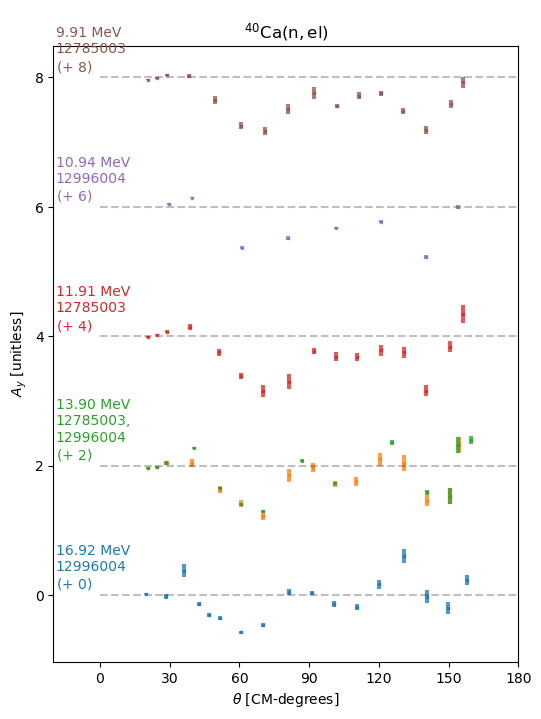

In [59]:
axes = (
    data[0]
    .data["Ay"]
    .plot(
        n_per_plot=6,
        label_kwargs={
            "label_xloc_deg": -19,
            "label_offset_factor": 0.1,
            "label_energy_err": False,
            "label_offset": True,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={
            "offsets": 2,
            "log": False,
            "draw_baseline": True,
        },
        y_size=8,
    )
)
axes[0].set_xlim([-20, 180])

In [11]:
print(reactions[1])
data[1].num_measurements

48-Ca(n,el)


{'dXS/dA': 2, 'Ay': 0}

In [12]:
data[1].data["dXS/dA"].print_failed_parses()

In [13]:
data[1].data["Ay"].print_failed_parses()

(-20.0, 180.0)

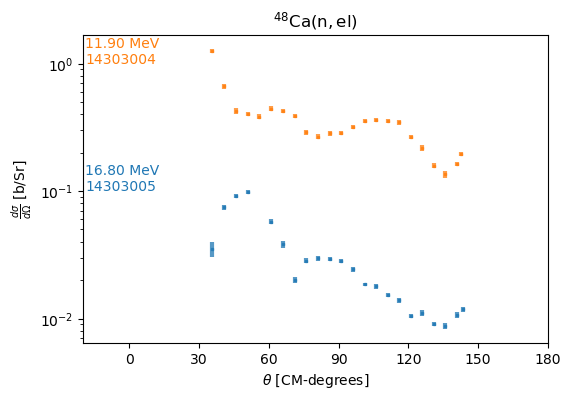

In [36]:
axes = (
    data[1]
    .data["dXS/dA"]
    .plot(
        n_per_plot=10,
        label_kwargs={
            "label_xloc_deg": -19,
            "label_offset_factor": 0.1,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 10},
        y_size=4,
    )
)
axes[0].set_xlim([-20, 180])

In [14]:
print(reactions[2])
data[2].num_measurements

40-Ca(p,el)


{'dXS/dA': 16, 'dXS/dRuth': 5, 'Ay': 11}

In [15]:
data[2].data["dXS/dA"].print_failed_parses()

Entry: C0624
C0624002  :  Ambiguous statistical error labels:
ERR-SYS, ERR-7, ERR-9, DATA-ERR
ERR-ANALYS (DATA-ERR) Relative uncertainty.
           (ERR-S,,1.) Statistical uncertainty <1%.
            Systematic uncertainties:
           (ERR-1,,1.) Dead time correction                 <1.0%
           (ERR-2,,0.1)  Correction for reaction losses
                                                 in NaI(Tl) <0.1%
           (ERR-3,,0.3)  Finite geometry correction         <0.3%
           (ERR-4,,1.)  Detector angle                      <1.0%
           (ERR-5,,1.5)  Incident proton energy             <1.5%
           (ERR-6,,2.)  Impurity subtraction - worst case    2.0%
           (ERR-SYS) Uncertainty in the absolute scale includes:
           (ERR-7) Uncertainty in the detector solid angle
           (ERR-8,,1.) Uncertainty in the target rotation angle
           (ERR-9) Uncertainty in the beam current integration
            * Uncertainty in the target thickness

Entry: O0142
O0142

In [16]:
data[2].data["dXS/dA"].reattempt_parse(
    "C0624",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["ERR-SYS"],
    },
)

Found subentry C0624002 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']


In [17]:
data[2].data["dXS/dA"].reattempt_parse(
    "O0142",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0142004 with the following columns:
['EN', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [18]:
data[2].data["dXS/dA"].reattempt_parse(
    "O0208",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-2"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0208006 with the following columns:
['EN', 'ERR-1', 'ANG-ERR', 'ANG-CM', 'DATA-CM', 'ERR-2']


In [19]:
data[2].data["dXS/dA"].reattempt_parse(
    "O0382",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T", "DATA-ERR"],
    },
)

Found subentry O0382002 with the following columns:
['EN', 'EN-RSL-FW', 'ANG-ERR', 'DATA-ERR', 'ANG-CM', 'DATA-CM', 'ERR-T']


In [24]:
data[2].data["dXS/dA"].reattempt_parse(
    "T0101",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["DATA-ERR1"],
    },
)

Found subentry T0101002 with the following columns:
['DATA-ERR1', 'EN', 'ANG-CM', 'DATA', 'DATA-ERR']


In [20]:
data[2].data["dXS/dRuth"].print_failed_parses()

Entry: E1677
E1677016  :  negative errors under label -DATA-ERR!
ERR-ANALYS (DATA-ERR) No information on source of uncertainties.
ERR-ANALYS (ERR-S,,5.) Statistical error <5%
Entry: O0211
O0211004  :  Ambiguous statistical error labels:
DATA-ERR, ERR-T

ERR-ANALYS (ERR-T).The Uncertainty is Reported by Authors.
           (DATA-ERR).Data-Point Reader Uncertainty.
           (ANG-ERR).Data-Point Reader Uncertainty.
Entry: O0253
O0253017  :  Ambiguous statistical error labels:
ERR-1, ERR-2, ERR-3, ERR-DIG
ERR-ANALYS (ERR-1) Relative uncertainties
           (ERR-2) Absolute uncertainty
           (ERR-3) the uncertainty in the corrections for carbon
           and oxygen at forward angles



In [25]:
data[2].data["dXS/dRuth"].reattempt_parse(
    "O0253",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-1", "ERR-DIG"],
        "systematic_err_labels": ["ERR-2"],
    },
)

Found subentry O0253017 with the following columns:
['EN-ERR', 'ERR-1', 'ERR-2', 'ERR-3', 'ANG-ERR-D', 'ERR-DIG', 'EN', 'ANG-CM', 'DATA']


In [21]:
data[2].data["Ay"].print_failed_parses()

Entry: C0076
C0076003  :  Ambiguous statistical error labels:
POL-BM-ERR, ERR-S
ERR-ANALYS (ERR-S) Statistical uncertainty.

Entry: E1677
E1677027  :  negative errors under label -DATA-ERR!
ERR-ANALYS (DATA-ERR) No information on source of uncertainties.
ERR-ANALYS  STATISTICAL ERROR <5%
Entry: O0208
O0208011  :  negative errors under label ERR-1!
ERR-ANALYS (ERR-1) Uncertainty in the target thickness.
ERR-ANALYS (ERR-2) Relative error include all sources of error
           except uncertainty in the target thickness.


In [22]:
data[2].data["Ay"].reattempt_parse(
    "C0076",
    parsing_kwargs={
        "statistical_err_labels": ["ERR-S"],
        "systematic_err_labels": [],
    },
)

Found subentry C0076003 with the following columns:
['E-RSL', 'EN', 'POL-BM', 'POL-BM-ERR', 'ANG-CM', 'DATA', 'ERR-S']


(-20.0, 180.0)

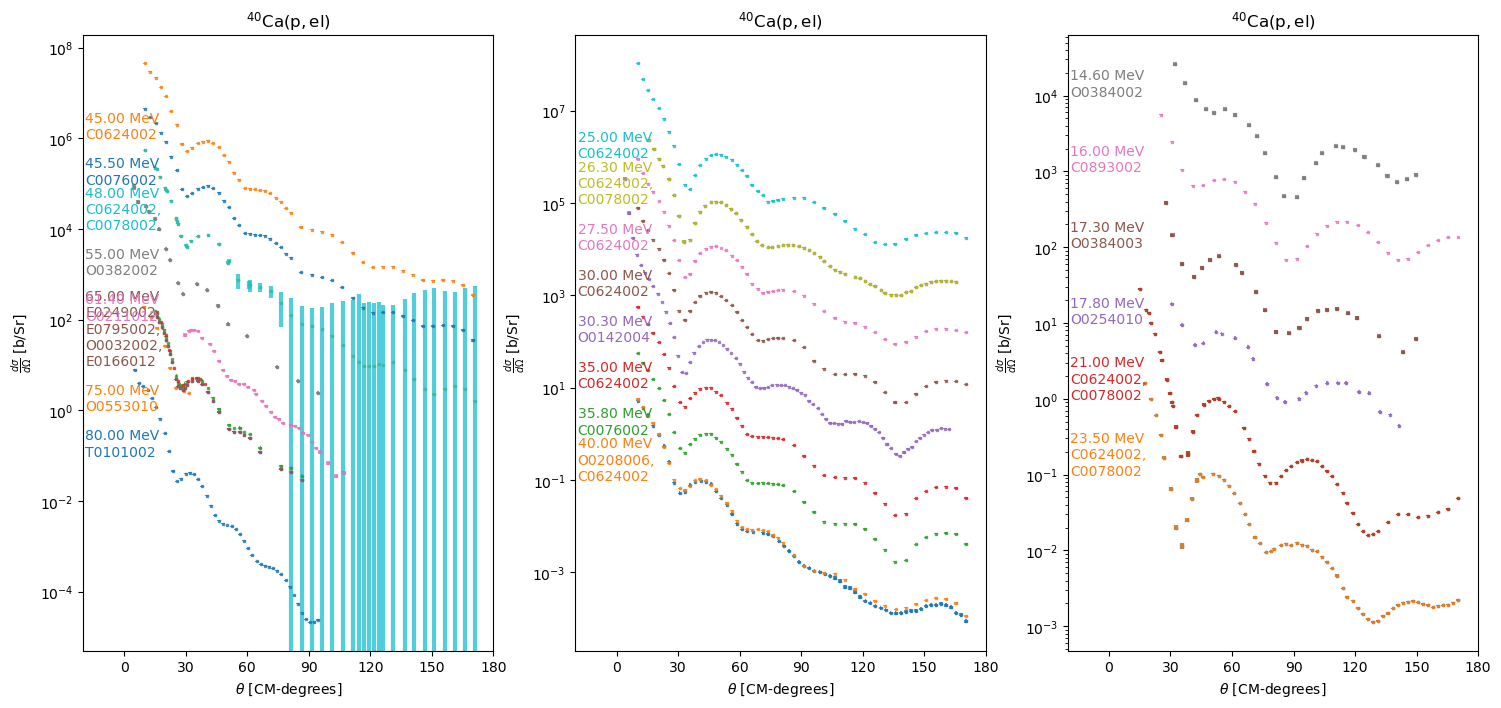

In [44]:
axes = (
    data[2]
    .data["dXS/dA"]
    .plot(
        n_per_plot=8,
        label_kwargs={
            "label_xloc_deg": -19,
            "label_offset_factor": 0.1,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 10},
        y_size=8,
    )
)
axes[0].set_xlim([-20, 180])
axes[1].set_xlim([-20, 180])
axes[2].set_xlim([-20, 180])

(-20.0, 180.0)

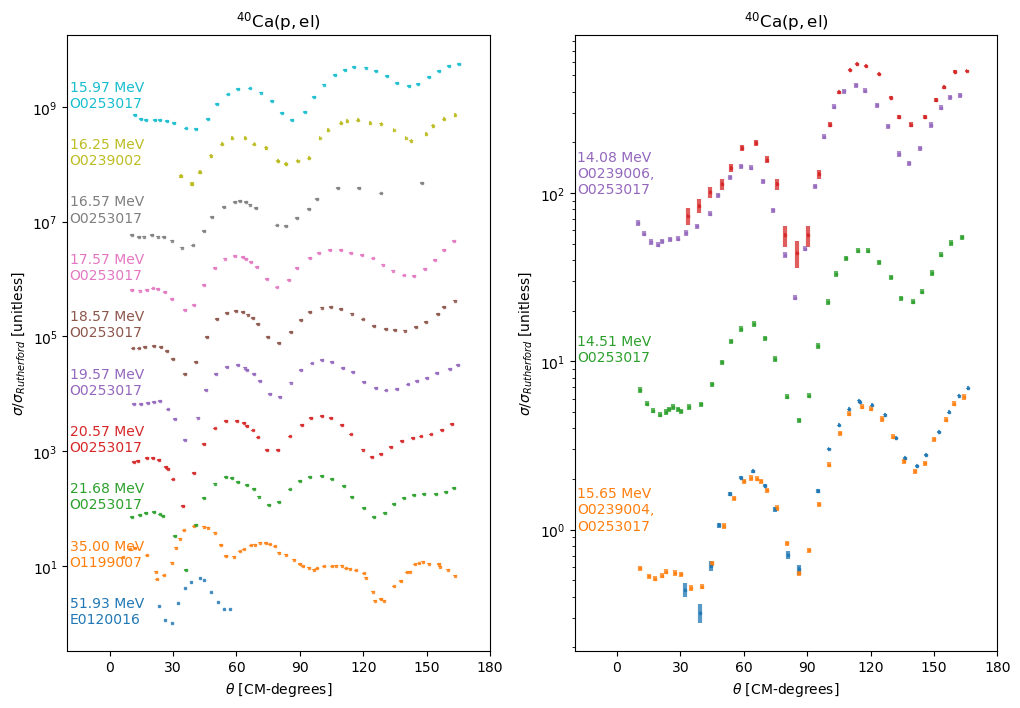

In [42]:
axes = (
    data[2]
    .data["dXS/dRuth"]
    .plot(
        n_per_plot=10,
        label_kwargs={
            "label_xloc_deg": -19,
            "label_offset_factor": 1,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 10},
        y_size=8,
    )
)
axes[1].set_xlim([-20, 180])
axes[0].set_xlim([-20, 180])

(-20.0, 180.0)

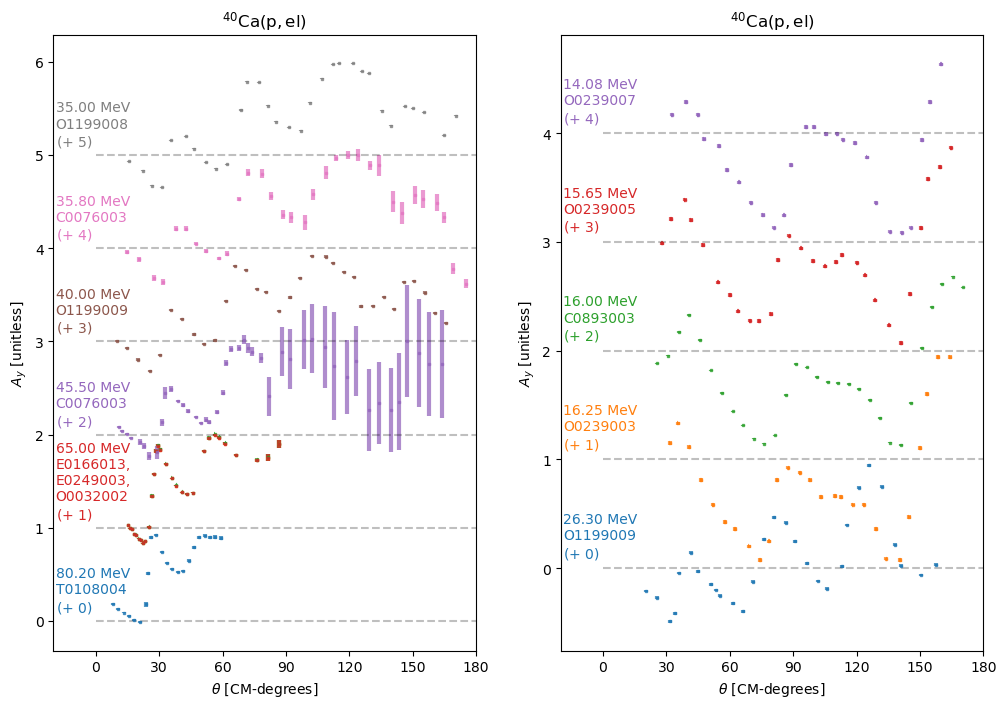

In [56]:
axes = (
    data[2]
    .data["Ay"]
    .plot(
        n_per_plot=6,
        label_kwargs={
            "label_xloc_deg": -19,
            "label_offset_factor": 0.1,
            "label_energy_err": False,
            "label_offset": True,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={
            "offsets": 1,
            "log": False,
            "draw_baseline": True,
        },
        y_size=8,
    )
)
axes[1].set_xlim([-20, 180])
axes[0].set_xlim([-20, 180])

In [26]:
print(reactions[3])
data[3].num_measurements

48-Ca(p,el)


{'dXS/dA': 4, 'dXS/dRuth': 3, 'Ay': 6}

In [27]:
data[3].data["dXS/dA"].print_failed_parses()

Entry: C0624
C0624005  :  Ambiguous statistical error labels:
ERR-SYS, ERR-7, ERR-9, DATA-ERR
ERR-ANALYS (DATA-ERR) Relative uncertainty.
           (ERR-S,,1.) Statistical uncertainty <1%.
            Systematic uncertainties:
           (ERR-1,,1.) Dead time correction                 <1.0%
           (ERR-2,,0.1)  Correction for reaction losses
                                                 in NaI(Tl) <0.1%
           (ERR-3,,0.3)  Finite geometry correction         <0.3%
           (ERR-4,,1.)  Detector angle                      <1.0%
           (ERR-5,,1.5)  Incident proton energy             <1.5%
           (ERR-6,,2.)  Impurity subtraction - worst case    2.0%
           (ERR-SYS) Uncertainty in the absolute scale includes:
           (ERR-7) Uncertainty in the detector solid angle
           (ERR-8,,1.) Uncertainty in the target rotation angle
           (ERR-9) Uncertainty in the beam current integration
            * Uncertainty in the target thickness



In [30]:
data[3].data["dXS/dA"].reattempt_parse(
    "C0624",
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR"],
        "systematic_err_labels": ["ERR-SYS"],
    },
)

Found subentry C0624005 with the following columns:
['EN-ERR', 'ERR-SYS', 'ERR-7', 'ERR-9', 'EN', 'EN-ERR', 'ANG-CM', 'DATA-CM', 'DATA-ERR']


In [31]:
data[3].data["dXS/dRuth"].print_failed_parses()

In [32]:
data[3].data["Ay"].print_failed_parses()

(-20.0, 180.0)

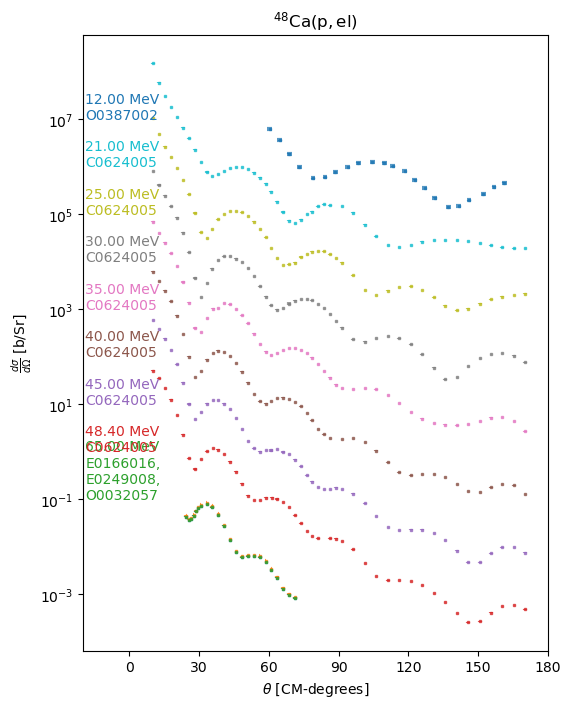

In [38]:
axes = (
    data[3]
    .data["dXS/dA"]
    .plot(
        n_per_plot=10,
        label_kwargs={
            "label_xloc_deg": -19,
            "label_offset_factor": 0.1,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        plot_kwargs={"offsets": 10},
        y_size=8,
    )
)
axes[0].set_xlim([-20, 180])

## Optical potential model form

In [71]:
from jitr.optical_potentials.potential_forms import (
    coulomb_charged_sphere,
    thomas_safe,
    woods_saxon_prime_safe,
    woods_saxon_safe,
)


def central_potential(r, Vv, Wv, Rv, av, Wd, Rd, ad):
    return (
        -Vv * woods_saxon_safe(r, Rv, av)
        - 1j * Wv * woods_saxon_safe(r, Rd, ad)
        + 4j * ad * Wd * woods_saxon_prime_safe(r, Rd, ad)
    )


def spin_orbit_potential(r, Vso, Wso, Rso, aso):
    return (
        (Vso + 1j * Wso)
        / jitr.utils.constants.WAVENUMBER_PION**2
        * thomas_safe(r, Rso, aso)
    )


def central_plus_coulomb(
    r, central_isoscalar_params, central_isovector_params, coulomb_params
):
    return central_potential(r, *central_params) + coulomb_charged_sphere(
        r, *coulomb_params
    )

In [67]:
def coulomb_correction(A, Z, RC):
    r"""
    Coulomb correction for proton energy
    """
    return 6.0 * Z * ALPHA * HBARC / (5 * RC)

In [60]:
from rxmc.params import Parameter

In [69]:
params = [
    # real central
    Parameter("Vv", unit="MeV"),
    Parameter("alpha", unit="MeV"),
    Parameter("beta", unit="MeV"),
    Parameter("rv", unit="fm"),
    Parameter("av", unit="fm"),
    # imag central volume
    Parameter("Wv", unit="MeV"),
    Parameter("gamma_w", unit="MeV"),
    Parameter("rd", unit="fm"),
    Parameter("ad", unit="fm"),
    # imag central surface
    Parameter("Wd", unit="MeV"),
    Parameter("gamma_d", unit="MeV"),
    # spin orbit
    Parameter("Vso", unit="MeV"),
    Parameter("Wso", unit="MeV"),
    Parameter("rso", unit="fm"),
    Parameter("aso", unit="fm"),
    # isovector
    Parameter("Vd1", unit="MeV"),
    Parameter("Wd1", unit="MeV"),
    Parameter("delta_R", unit="fm"),
    Parameter("delta_a", unit="fm"),
]
NUM_PARAMS = len(params)
NUM_PARAMS

19

In [72]:
def calculate_parameters(
    target,
    projectile,
    Ecm,
    Ef,
    Vv,
    alpha,
    beta,
    rv,
    av,
    Wv,
    gamma_w,
    rd,
    ad,
    Wd,
    gamma_d,
    Vso,
    Wso,
    rso,
    aso,
    Vd1,
    Wd1,
    delta_R,
    delta_a,
):
    # asymmetry
    A, Z = target
    Ap, Zp = projectile
    assert Ap == 1 and (Zp == 1 or Zp == 0)
    asym_factor = (A - 2 * Z) / (A)
    asym_factor *= (-1) ** (Zp + 1)  # -1 for neutrons, +1 for protons

    # energy
    dE = E
    # dE = E - Ef
    if projectile == (1, 1):
        deltaVC = coulomb_correction(A, Z, RC)
        # dE -= deltaVC

    erg_v = 1 + (alpha * dE + beta * dE**2) / Vv
    erg_w = dE**2 / (dE**2 + gamma_w**2)
    erg_wd = dE**2 / (dE**2 + gamma_d**2) * np.exp(-dE / gamma_d)

    # central isoscalar depths
    V = V0 * erg_v
    W = W0 * erg_w
    Wd = Wd0 * erg_wd

    Rv = rv * A ** (1.0 / 3.0)
    Rd = rd * A ** (1.0 / 3.0)
    Rso = rso * A ** (1.0 / 3.0)
    R1 = Rv + delta_R
    a1 = av + delta_a
    Rc = Rv - 0.5 * asym_factor * delta_R

    return (
        (V, W, Wd, Rv, av, Rd, ad),
        (0, 0, Vd1 + 1j * Wd1, Rv, av, R1, a1),
        (Vso0, Wso0, Rso, aso),
        (Z * Zp, RC),
        asym_factor,
    )